In [1]:
0#This is Good Practioce for the moment

!rm -rf /opt/conda/lib/python3.10/site-packages/fsspec*
!pip install fsspec==2024.6.0 --force-reinstall --no-deps
!pip install opencv-python

  Using cached fsspec-2024.6.0-py3-none-any.whl.metadata (11 kB)
Using cached fsspec-2024.6.0-py3-none-any.whl (176 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.5 MB)


In [2]:
#install also to vizualize figures
!sudo apt-get update
!sudo apt-get install -y libgl1-mesa-glx
!sudo apt-get install -y libglib2.0-0

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease                       
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]      
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]      
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [998 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2224 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3045 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2967 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.7 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1149 kB]
Get:12 http://archive.ubuntu.com/ubuntu ja

In [3]:
import pandas as pd

#Kaggle Files
rd = './kaggle-files'

df = pd.read_csv(f'{rd}/train.csv')

df = df.fillna(-100)
label2id = {'Normal/Mild': 0, 'Moderate':1, 'Severe':2}
df = df.replace(label2id)

df.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,4646740,0,0,1,2,0,0,0,0,1,...,0,0,0,2,0,0,1,1,1,0
2,7143189,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8785691,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10728036,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Load the coordinates data
coordinates_df = pd.read_csv(f'{rd}/train_label_coordinates.csv')


coordinates_df.head()

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602


In [5]:
CONDITIONS = coordinates_df['condition'].unique()

LEVELS = coordinates_df['level'].unique()

In [6]:
series_description_df = pd.read_csv(f'{rd}/train_series_descriptions.csv')
series_description_df['series_description'] = series_description_df['series_description'].str.replace('T2/STIR', 'T2_STIR')
series_description_df.head()



,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2_STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1


In [7]:
print(df.columns)
print(coordinates_df.columns)
print(series_description_df.columns)
print(CONDITIONS)
print(LEVELS)

Index(['study_id', 'spinal_canal_stenosis_l1_l2',
       'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
       'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1',
       'left_neural_foraminal_narrowing_l1_l2',
       'left_neural_foraminal_narrowing_l2_l3',
       'left_neural_foraminal_narrowing_l3_l4',
       'left_neural_foraminal_narrowing_l4_l5',
       'left_neural_foraminal_narrowing_l5_s1',
       'right_neural_foraminal_narrowing_l1_l2',
       'right_neural_foraminal_narrowing_l2_l3',
       'right_neural_foraminal_narrowing_l3_l4',
       'right_neural_foraminal_narrowing_l4_l5',
       'right_neural_foraminal_narrowing_l5_s1',
       'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3',
       'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5',
       'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
       'right_subarticular_stenosis_l2_l3',
       'right_subarticular_stenosis_l3_l4',
 

## BUilding the Dataloader

To summarize, the `dataloader` will:
- Load images from different series descriptions (e.g., 'Sagittal T1', 'Sagittal T2_STIR', 'Axial T2') for each `study_id`.
- Use the `coordinates_df` to access the `x`, `y` annotations for specific conditions and levels when available.
- Combine the information from `df` to create labels for the different conditions and levels.

### DataLoader Steps
1. **Load Images by Study**: For each `study_id`, load slices from each `series_description` into a tensor.
2. **Annotations**: Use `coordinates_df` to check if a condition has an associated `x`, `y` coordinate. If not, handle the absence gracefully.
3. **Label Extraction**: Use `df` to extract the condition-level labels for each study.
4. **Return Image and Labels**: Output images and labels, with a focus on condition-level features.


In [8]:
import os
import numpy as np
import cv2 
from torch.utils.data import Dataset, DataLoader
from glob import glob
from PIL import Image

IMG_SIZE = [512, 512]  # Image dimensions (height, width)
IN_CHANS = 30  # Number of channels (total slices across different series)

class RSNA24Dataset(Dataset):
    def __init__(self, df, coordinates_df, series_description_df, img_size=(512, 512), in_chans=30, transform=None):
        self.df = df
        self.coordinates_df = coordinates_df
        self.series_description_df = series_description_df
        self.img_size = img_size
        self.in_chans = in_chans
        self.transform = transform
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Initialize the image tensor for all slices (we assume 30 slices across all series)
        x = np.zeros((self.img_size[0], self.img_size[1], self.in_chans), dtype=np.float32)
        t = self.df.iloc[idx]
        st_id = t['study_id']  # Get the study ID
        label = t[1:].values.astype(np.int64)  # Labels for conditions and levels
        
        # Load images from the given study_id, across different series descriptions
        series_descriptions = ['Sagittal T1', 'Sagittal T2_STIR', 'Axial T2']
        channel_offset = 0

        for desc in series_descriptions:
            images = glob(f'./rsna_output/cvt_png/{st_id}/{desc}/*.png')
            images = sorted(images)
            num_images = min(10, len(images))  # Limit to 10 images per description
            
            for i in range(num_images):
                try:
                    img = cv2.imread(images[i], cv2.IMREAD_GRAYSCALE)  # Open image as grayscale
                    img_resized = cv2.resize(img, (self.img_size[1], self.img_size[0]))  # Resize using OpenCV
                    x[..., channel_offset + i] = img_resized.astype(np.float32)  # Assign to tensor
                except Exception as e:
                    print(f"Error loading or processing image {images[i]}: {e}")
                    continue

            channel_offset += 10  # Offset for the next series_description

        # Normalize the image data to [0, 1] range
        x = x / 255.0  # Normalize pixel values to [0, 1]

        # Load coordinates from coordinates_df if they exist for this study
        condition_annotations = []
        condition_coords = self.coordinates_df[self.coordinates_df['study_id'] == st_id]
        if not condition_coords.empty:
            for _, row in condition_coords.iterrows():
                x_coord, y_coord = row['x'], row['y']
                condition_annotations.append((row['condition'], row['level'], (x_coord, y_coord)))
        else:
            # If no annotations are available, append (-1, -1) to indicate absence
            condition_annotations = [(-1, -1)] * len(self.df.columns[1:])
        
        return x, label, condition_annotations




In [9]:
# # Test Visualizing sample batch

# tmp_ds = RSNA24Dataset(df, coordinates_df, series_description_df)
# tmp_dl = DataLoader(
#     tmp_ds,
#     batch_size=2,
#     shuffle=False,
#     pin_memory=True,
#     drop_last=False,
#     num_workers=0
# )

# for i, (x, label, annotations) in enumerate(tmp_dl):
#     if i == 0:  # Visualize the first sample
#         print(f"Image tensor shape: {x.shape}")
#         print(f"Labels: {label}")
#         print(f"Annotations: {annotations}")
#         break

## Creating the model

1. **Separate Convolutional Branches**: 
   - Each branch processes the 10 slices from a specific series description (`Sagittal T1`, `Sagittal T2_STIR`, `Axial T2`) independently.
   - After two convolutional and pooling layers, the feature maps are flattened.

2. **Feature Combination**:
   - The flattened feature maps from all three branches are concatenated and passed through fully connected layers.

3. **Dual Output**:
   - The model produces two outputs:
     - **condition_pred**: A 25-class classification output for the condition labels.
     - **coord_pred**: A 2-dimensional prediction for the x, y coordinates.


In [76]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNHybridModel(nn.Module):
    def __init__(self):
        super(CNNHybridModel, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(10, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(1572864, 512)  # Adjusted input size
        self.fc2 = nn.Linear(512, 256)
        
        # Output heads for condition prediction and coordinate prediction
        self.fc_condition = nn.Linear(256, 25)  # Predict 25 conditions
        self.fc_coords = nn.Linear(256, 2)  # Predict x and y coordinates

    def forward(self, x_sagittal_t1, x_sagittal_t2_stir, x_axial_t2):
        # Apply convolutions separately on each set of images
        x1 = self.pool(F.relu(self.conv1(x_sagittal_t1)))
        x1 = self.pool(F.relu(self.conv2(x1)))
        x1 = self.pool(F.relu(self.conv3(x1)))

        x2 = self.pool(F.relu(self.conv1(x_sagittal_t2_stir)))
        x2 = self.pool(F.relu(self.conv2(x2)))
        x2 = self.pool(F.relu(self.conv3(x2)))

        x3 = self.pool(F.relu(self.conv1(x_axial_t2)))
        x3 = self.pool(F.relu(self.conv2(x3)))
        x3 = self.pool(F.relu(self.conv3(x3)))

        # Flatten the feature maps before passing to the fully connected layers
        x1_flat = x1.reshape(x1.size(0), -1)
        x2_flat = x2.reshape(x2.size(0), -1)
        x3_flat = x3.reshape(x3.size(0), -1)

        # Concatenate all features
        combined_features = torch.cat((x1_flat, x2_flat, x3_flat), dim=1)

        # Pass it through the fully connected layers
        x = F.relu(self.fc1(combined_features))
        x = F.relu(self.fc2(x))

        # Output heads
        condition_pred = self.fc_condition(x)  # Condition classification
        coord_pred = self.fc_coords(x)  # Coordinate regression

        return condition_pred, coord_pred

# Instantiate the model
model = CNNHybridModel()

In [77]:
#!pip install torchviz

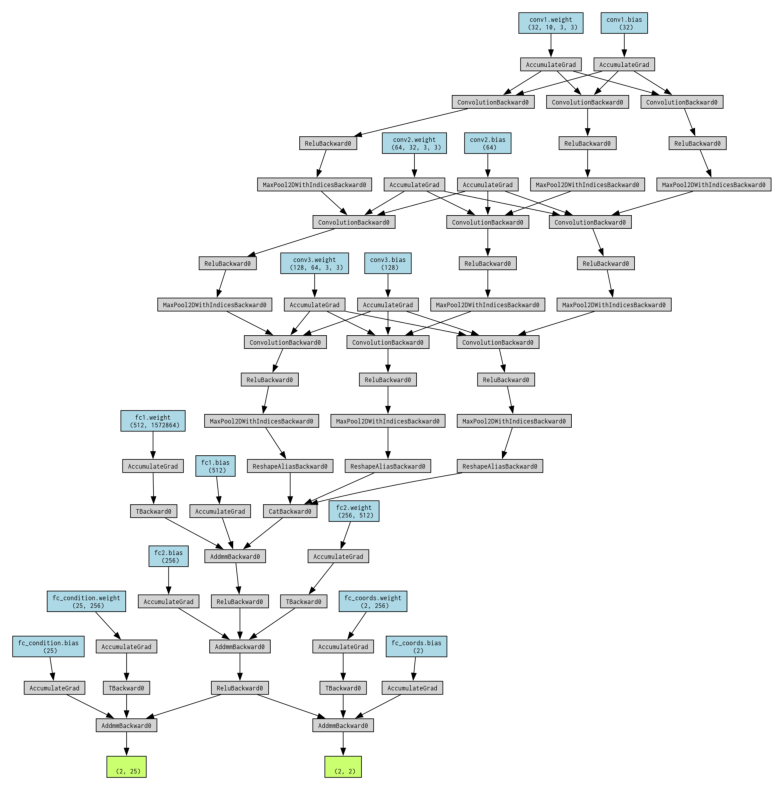

In [78]:
from torchviz import make_dot
from PIL import Image
import matplotlib.pyplot as plt

# Create dummy data to simulate model input
batch_size = 2
dummy_sagittal_t1 = torch.randn(batch_size, 10, 512, 512)  # 10 slices for Sagittal T1
dummy_sagittal_t2_stir = torch.randn(batch_size, 10, 512, 512)  # 10 slices for Sagittal T2/STIR
dummy_axial_t2 = torch.randn(batch_size, 10, 512, 512)  # 10 slices for Axial T2

# Pass through the model to get a forward pass
condition_pred, coord_pred = model(dummy_sagittal_t1, dummy_sagittal_t2_stir, dummy_axial_t2)

# Create the computational graph
dot = make_dot((condition_pred, coord_pred), params=dict(model.named_parameters()))

# Render to a file and display it
dot.render("model_diagram", format="png")  # Save as PNG

# Load and display the image
img = Image.open("model_diagram.png")
plt.figure(figsize=(10, 10))  # Increase the figure size for better clarity
plt.imshow(img)
plt.axis('off')  # Hide axes for clarity
plt.show()


## Building Main Train Loop

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the loss functions
classification_loss_fn = nn.CrossEntropyLoss()  # For condition classification
coordinate_loss_fn = nn.MSELoss()  # For coordinate regression

# Set up the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)



# Training loop
def train_model(model, dataloader, optimizer, num_epochs=10):
    model.train()  # Set the model to training mode
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        
        for i, (images, labels, annotations) in enumerate(dataloader):
            # Split the data into image parts and labels correctly
            sagittal_t1_images = images[:, :, :, :10].permute(0, 3, 1, 2)  # Sagittal T1 (first 10 channels), permute to [batch, channels, height, width]
            sagittal_t2_stir_images = images[:, :, :, 10:20].permute(0, 3, 1, 2)  # Sagittal T2/STIR (next 10 channels)
            axial_t2_images = images[:, :, :, 20:].permute(0, 3, 1, 2)  # Axial T2 (last 10 channels)
        
            # Now, print the shapes to verify
            print(f"Sagittal T1 Images Shape: {sagittal_t1_images.shape}")
            print(f"Sagittal T2/STIR Images Shape: {sagittal_t2_stir_images.shape}")
            print(f"Axial T2 Images Shape: {axial_t2_images.shape}")
            
            # Print labels as well for verification
            print(f"Condition Labels Shape: {labels.shape}")
            print(f"Annotations: {annotations}")
        


            condition_labels = labels[:, :25]  # First 25 columns are condition labels

            # Ensure the labels are long (int64) type for CrossEntropyLoss
            condition_labels = condition_labels.long()

            # Extract the coordinates from annotations
            coord_labels = torch.stack([torch.tensor(annotation[2][0]) for annotation in annotations])

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass through the model
            condition_pred, coord_pred = model(sagittal_t1_images, sagittal_t2_stir_images, axial_t2_images)

            # Calculate classification loss (condition prediction)
            classification_loss = classification_loss_fn(condition_pred, condition_labels)

            # Calculate coordinate regression loss
            coord_loss = coordinate_loss_fn(coord_pred, coord_labels)

            # Total loss is a combination of classification and coordinate losses
            total_loss = classification_loss + coord_loss

            # Backpropagation and optimization
            total_loss.backward()
            optimizer.step()

            running_loss += total_loss.item()

            if i % 10 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], Loss: {total_loss.item():.4f}")

        print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {running_loss/len(dataloader):.4f}")





In [82]:

# Run the training loop

tmp_ds = RSNA24Dataset(df, coordinates_df, series_description_df)
tmp_dl = DataLoader(
    tmp_ds,
    batch_size=2,
    shuffle=False,
    pin_memory=True,
    drop_last=False,
    num_workers=0
)

num_epochs = 10  # You can set the number of epochs here
train_model(model, tmp_dl, optimizer, num_epochs=num_epochs)

Sagittal T1 Images Shape: torch.Size([2, 10, 512, 512])
Sagittal T2/STIR Images Shape: torch.Size([2, 10, 512, 512])
Axial T2 Images Shape: torch.Size([2, 10, 512, 512])
Condition Labels Shape: torch.Size([2, 25])
Annotations: [[['Spinal Canal Stenosis', 'Right Subarticular Stenosis'], ['L1/L2', 'L1/L2'], [tensor([322.8319, 184.1810], dtype=torch.float64), tensor([227.9646, 263.2398], dtype=torch.float64)]], [['Spinal Canal Stenosis', 'Left Subarticular Stenosis'], ['L2/L3', 'L1/L2'], [tensor([320.5714, 235.3171], dtype=torch.float64), tensor([295.7143, 264.0836], dtype=torch.float64)]], [['Spinal Canal Stenosis', 'Left Subarticular Stenosis'], ['L3/L4', 'L2/L3'], [tensor([323.0303, 235.3171], dtype=torch.float64), tensor([371.8182, 254.7178], dtype=torch.float64)]], [['Spinal Canal Stenosis', 'Right Subarticular Stenosis'], ['L4/L5', 'L2/L3'], [tensor([335.2920, 200.9774], dtype=torch.float64), tensor([427.3274, 256.8688], dtype=torch.float64)]], [['Spinal Canal Stenosis', 'Right Suba

/tmp/ipykernel_167/2771277999.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coord_labels = torch.stack([torch.tensor(annotation[2][0]) for annotation in annotations])


RuntimeError: Expected floating point type for target with class probabilities, got Long

In [ ]:
# Example usage
tmp_ds = RSNA24Dataset(df, coordinates_df, series_description_df)
tmp_dl = DataLoader(
    tmp_ds,
    batch_size=2,
    shuffle=False,
    pin_memory=True,
    drop_last=False,
    num_workers=0
)

# Visualizing sample batch
for i, (x, label, annotations) in enumerate(tmp_dl):
    if i == 0:  # Visualize the first sample
        print(f"Image tensor shape: {x.shape}")
        print(f"Labels: {label}")
        print(f"Annotations: {annotations}")
        break

In [15]:
import torch
import torch.nn as nn

class CNNHybridModel(nn.Module):
    def __init__(self, in_channels=30, num_classes=25):
        super(CNNHybridModel, self).__init__()
        
        # CNN backbone
        self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(256 * 64 * 64, 1024)  # Adjust input size based on downsampling
        self.fc2 = nn.Linear(1024, 512)
        
        # Classification head for conditions
        self.fc_class = nn.Linear(512, num_classes)
        
        # Regression head for coordinates
        self.fc_coord = nn.Linear(512, 2)
        
    def forward(self, x):
        # Pass input through the convolutional layers and pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
    
        # Flatten the feature maps
        x = x.reshape(x.size(0), -1)  # Use reshape instead of view
    
        # Fully connected layers
        x = F.relu(self.fc1(x))
        
        # Output branches
        condition_pred = self.fc2(x)  # Predicts condition labels
        coord_pred = self.fc3(x)  # Predicts coordinates
        
        return condition_pred, coord_pred



In [16]:
model = CNNHybridModel(in_channels=30, num_classes=25)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define losses
classification_loss_fn = nn.BCELoss()  # For condition classification
regression_loss_fn = nn.MSELoss()  # For coordinate prediction


In [17]:
def train_model(model, dataloader, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(dataloader):
            images = images.permute(0, 3, 1, 2).float()  # Convert to [batch_size, channels, height, width]
            condition_labels = labels[:, :25]  # First 25 are condition labels
            coord_labels = labels[:, 25:]  # Last 2 are coordinates (x, y)
            
            # Forward pass
            optimizer.zero_grad()
            condition_pred, coord_pred = model(images)
            
            # Calculate losses
            classification_loss = classification_loss_fn(condition_pred, condition_labels)
            regression_loss = regression_loss_fn(coord_pred, coord_labels)
            total_loss = classification_loss + regression_loss
            
            # Backward pass and optimization
            total_loss.backward()
            optimizer.step()
            
            running_loss += total_loss.item()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader)}")

# Train the model
train_model(model, tmp_dl, optimizer, num_epochs=10)


AttributeError: 'CNNHybridModel' object has no attribute 'fc3'

In [15]:
import numpy as np
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
import os
from glob import glob
import random

# Assuming IMG_SIZE and IN_CHANS are defined globally
IMG_SIZE = [512, 512]
IN_CHANS = 30  # Number of input channels (10 per modality)
id2label = {0: 'Normal/Mild', 1: 'Moderate', 2: 'Severe'}  # Severity labels

# Color map for the different vertebral levels
level_color_map = {
    'L1/L2': 'red',
    'L2/L3': 'green',
    'L3/L4': 'blue',
    'L4/L5': 'yellow',
    'L5/S1': 'purple'
}

class RSNA24Dataset(Dataset):
    def __init__(self, df, coordinates_df, phase='train', transform=None):
        """
        Args:
        df: DataFrame with severity labels from train.csv
        coordinates_df: DataFrame with x/y coordinates from train_label_coordinates.csv
        transform: Data augmentation/transformation to apply to the images
        """
        self.df = df
        self.coordinates_df = coordinates_df
        self.transform = transform
        self.phase = phase
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Initialize the image tensor (IMG_SIZE x IMG_SIZE x IN_CHANS)
        x = np.zeros((IMG_SIZE[0], IMG_SIZE[1], IN_CHANS), dtype=np.uint8)
        t = self.df.iloc[idx]  # Get the current row of severity data
        st_id = int(t['study_id'])  # Study ID

        # Prepare severity label for all conditions/levels in a dictionary
        severity_labels = t[1:].values.astype(np.int64)
        
        # Load MRI images from different series descriptions
        x = self.load_mri_images(st_id)

        # Get the condition-specific x/y coordinates
        condition_coordinates = self.coordinates_df[self.coordinates_df['study_id'] == st_id]
        
        # Pick a random condition for visualization purposes
        if not condition_coordinates.empty:
            row = condition_coordinates.sample().iloc[0]
            condition = row['condition']
            level = row['level']
            x_coord, y_coord = row['x'], row['y']
        else:
            condition, level, x_coord, y_coord = None, None, None, None

        # Apply transformations if provided (e.g., augmentation)
        if self.transform is not None:
            x = self.transform(image=x)['image']

        # Transpose to match PyTorch expected shape (channels, height, width)
        x = x.transpose(2, 0, 1)

        # Return image, severity labels, condition, and coordinates
        return x, severity_labels, (condition, level, x_coord, y_coord)

    def load_mri_images(self, st_id):
        """
        Load MRI images for a given study ID and populate the image tensor.
        """
        x = np.zeros((IMG_SIZE[0], IMG_SIZE[1], IN_CHANS), dtype=np.uint8)
        
        # Sagittal T1
        for i in range(0, 10, 1):
            try:
                p = f'./rsna_output/cvt_png/{st_id}/Sagittal T1/{i:03d}.png'
                img = Image.open(p).convert('L')
                img = np.array(img)
                x[..., i] = img.astype(np.uint8)
            except:
                pass
            
        # Sagittal T2/STIR
        for i in range(0, 10, 1):
            try:
                p = f'./rsna_output/cvt_png/{st_id}/Sagittal T2_STIR/{i:03d}.png'
                img = Image.open(p).convert('L')
                img = np.array(img)
                x[..., i+10] = img.astype(np.uint8)
            except:
                pass
            
        # Axial T2
        axt2 = glob(f'./rsna_output/cvt_png/{st_id}/Axial T2/*.png')
        axt2 = sorted(axt2)
    
        step = len(axt2) / 10.0
        st = len(axt2)/2.0 - 4.0*step
        end = len(axt2)+0.0001
                
        for i, j in enumerate(np.arange(st, end, step)):
            try:
                p = axt2[max(0, int((j-0.5001).round()))]
                img = Image.open(p).convert('L')
                img = np.array(img)
                x[..., i+20] = img.astype(np.uint8)
            except:
                pass  
            
        return x



In [7]:
# Instead of combining only the first three channels, display all channels in a grid
def visualize_sample(image, condition, level, x, y, severity):
    if condition is None or level is None:
        print("No condition or level found.")
        return

    # Create a grid of all the channels (assuming 30 channels total)
    num_channels = 20
    num_cols = 5  # Display 5 images per row
    num_rows = (num_channels + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

    # Plot each channel in a separate subplot
    for i in range(num_channels):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        ax.imshow(image[i, :, :], cmap='gray')
        ax.set_title(f'Channel {i+1}')
        ax.axis('off')

        # If this channel is relevant, plot the box
        if condition and x and y and i == 0:  # Example: draw the box in the first channel
            box_size = 50
            color = level_color_map.get(level, 'red')
            ax.add_patch(plt.Rectangle((x - box_size // 2, y - box_size // 2), box_size, box_size, 
                                       linewidth=2, edgecolor=color, facecolor='none'))
            ax.text(x, y, f"{condition} - {level} - {severity}", color=color, fontsize=8, backgroundcolor='white')

    plt.tight_layout()
    plt.show()


Severity: Normal/Mild


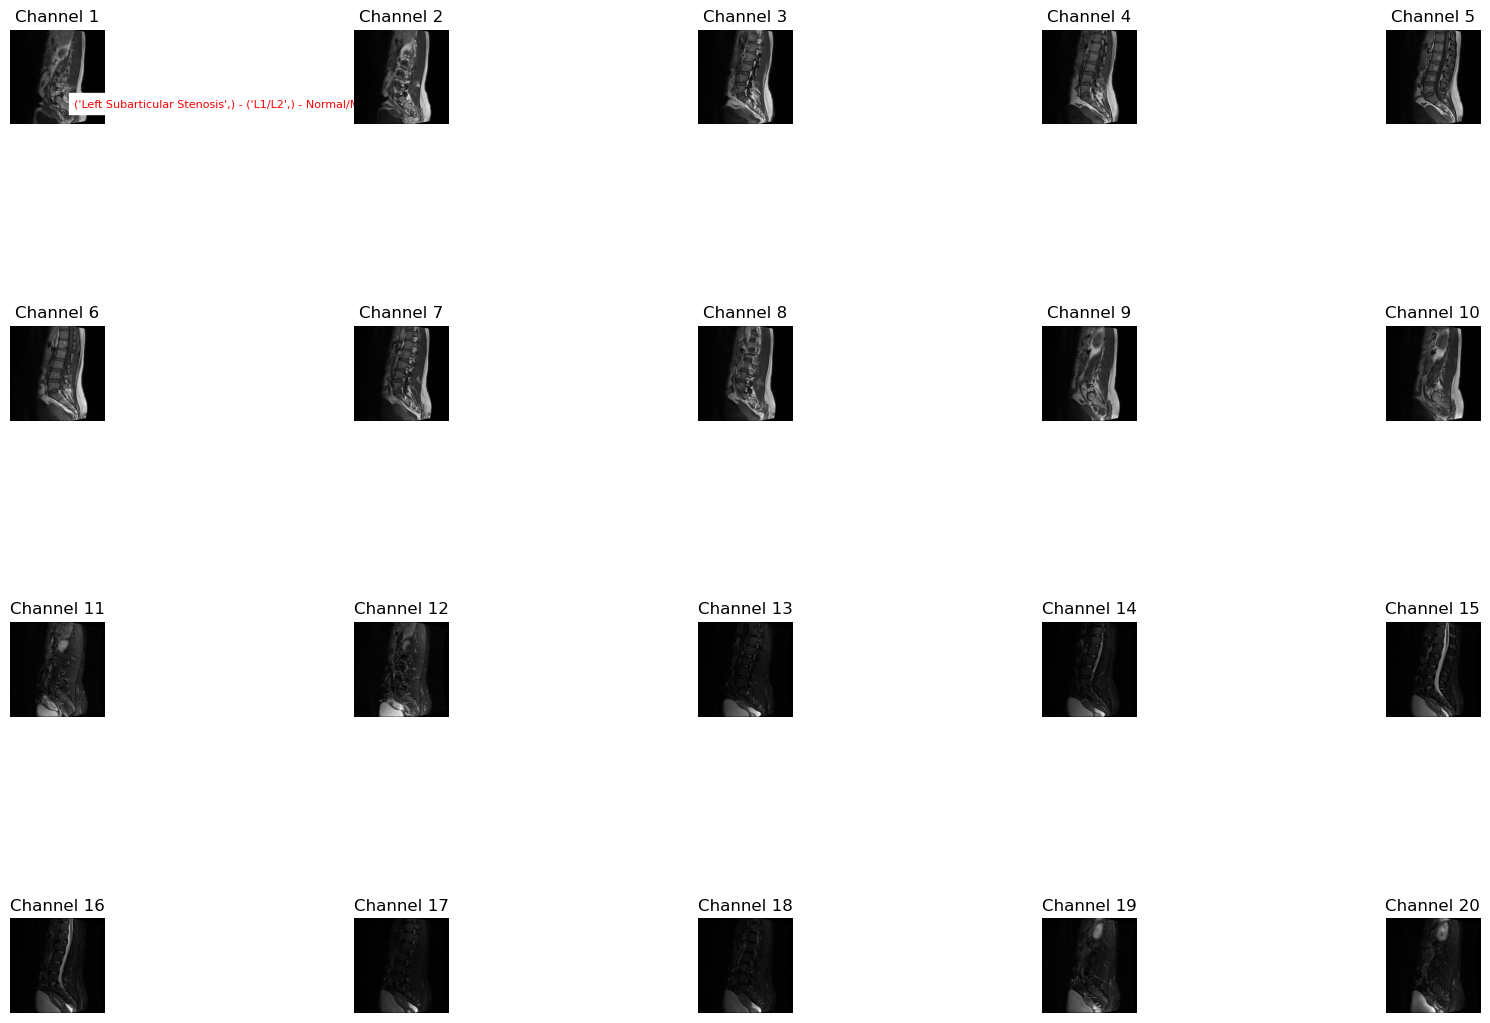

In [8]:
# Testing the DataLoader and Visualization
tmp_ds = RSNA24Dataset(df, coordinates_df, phase='train')
tmp_dl = DataLoader(tmp_ds, batch_size=1, shuffle=True)

# Visualizing a random sample
for i, (x, severity_labels, (condition, level, x_coord, y_coord)) in enumerate(tmp_dl):
    if i == 1:  # Let's just visualize one sample
        severity = id2label[int(severity_labels[0][0])]  # Convert tensor to integer
        print(f"Severity: {severity}")
        visualize_sample(x.numpy()[0], condition, level, x_coord, y_coord, severity)
        break


In [9]:
# Perform A data Augmentation
import albumentations as A

IMG_SIZE = [512, 512]

transforms_val = A.Compose([
    A.Resize(IMG_SIZE[0], IMG_SIZE[1]),
    A.Normalize(mean=0.5, std=0.5)
])

ModuleNotFoundError: No module named 'albumentations'

In [ ]:
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

IN_CHANS = 30

# Testing DataLoader
tmp_ds = RSNA24Dataset(df, phase='train', transform=transforms_val)
tmp_dl = DataLoader(
            tmp_ds,
            batch_size=2,
            shuffle=False,
            pin_memory=True,
            drop_last=False,
            num_workers=0
            )

for i, (x, t) in enumerate(tmp_dl):
    if i==4:break
    print('x stat:', x.shape, x.min(), x.max(),x.mean(), x.std())
    print(t, t.shape)
    y = x.numpy().transpose(0,2,3,1)[0,...,:3]
    y = (y + 1) / 2
    plt.imshow(y)
    plt.show()
    print('y stat:', y.shape, y.min(), y.max(),y.mean(), y.std())
    print()
plt.close()
del tmp_ds, tmp_dl


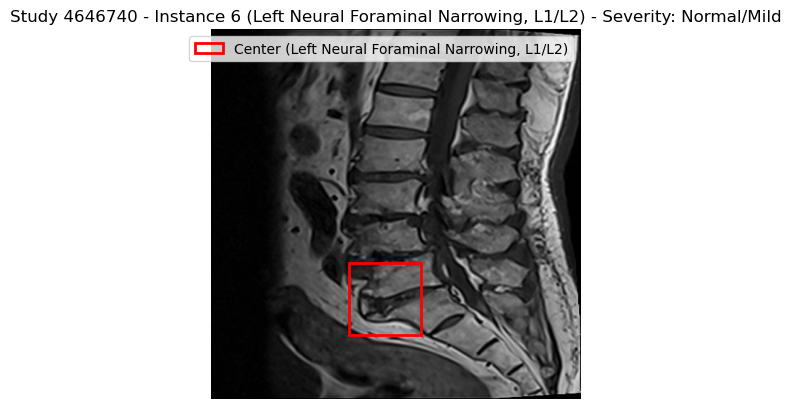

In [72]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Severity label mapping
id2label = {0: 'Normal/Mild', 1: 'Moderate', 2: 'Severe'}


# Function to load and visualize the image with the coordinates and severity
def plot_image_with_coordinates(study_id, series_id, instance_number, x, y, condition, level):
    # Construct the path (adjust the path if necessary based on your directory structure)
    series_description = series_description_df.loc[
    (series_description_df['study_id'] == study_id) & 
    (series_description_df['series_id'] == series_id)]['series_description'].values[0]
    
    image_path = f'./rsna_output/cvt_png/{study_id}/{series_description}/{instance_number:03d}.png'
    
    if os.path.exists(image_path):
        # Load the image
        img = Image.open(image_path)
        
        # Modify the level to replace '/' with '_'
        level_modified = level.lower().replace("/", "_")
        
        # Retrieve the severity from the relevant column in the df DataFrame
        severity_column = f'{condition.lower().replace(" ", "_")}_{level_modified}'
        
        # Check if the column exists before attempting to access it
        if severity_column in df.columns:
            severity_id = df.loc[df['study_id'] == study_id, severity_column].values[0]
            severity_label = id2label[severity_id]  # Convert severity ID to label
        else:
            print(f"Severity column {severity_column} not found.")
            return
        
        # Flip the y-coordinate to match the bottom-left origin
        flipped_y = img.size[1] - y
        
        # Plot the image
        plt.imshow(img, cmap='gray')
        plt.gca().add_patch(plt.Rectangle((x-50, flipped_y-50), 100, 100, linewidth=2, edgecolor='red', facecolor='none', label=f"Center ({condition}, {level})"))
        plt.legend()
        plt.title(f'Study {study_id} - Instance {instance_number} ({condition}, {level}) - Severity: {severity_label}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Image not found for Study {study_id}, Series_description {series_description}, Series {series_id}, Instance {instance_number}")

# Example: Plot one sample from the coordinates dataframe
# Choosing a known sample
study_id_value = 4646740
condition_value = CONDITIONS[2]
level_value = LEVELS[0]

sample = coordinates_df.loc[
    (coordinates_df['study_id'] == study_id_value) & 
    (coordinates_df['condition'] == condition_value) & 
    (coordinates_df['level'] == level_value)
]

plot_image_with_coordinates(
    sample['study_id'].values[0], 
    sample['series_id'].values[0], 
    sample['instance_number'].values[0], 
    sample['x'].values[0], 
    sample['y'].values[0], 
    sample['condition'].values[0], 
    sample['level'].values[0]
)
